<a href="https://colab.research.google.com/github/aahmadf123/ML_ChemE/blob/main/boiling_point_of_compounds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boiling Point of Compounds
Based on:
 1. S.-Y. Kim, I. Jeon and S.-J. Kang, "Integrating Data Science and Machine Learning to Chemistry Education: Predicting Classification and Boiling Point of Compounds", J. Chem. Educ., 101, 1771–1776 (2024). [doi:10.1021/acs.jchemed.3c01040](doi.org/10.1021/acs.jchemed.3c01040)
 2. A. Géron, Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems, Third edition (2023) ISBN: 9781098125974


## Setup

In [19]:
from pylab import *
import pandas as pd
import sklearn

In [20]:
sklearn.set_config(display='diagram')

## Functions

In [21]:
def plot_fun(bps, bp_predictions, t=None):
    plot(bps, bp_predictions,'o')
    plot(bps,bps)
    axis('square')
    xlabel('Boiling Point')
    ylabel('Predicted Boiling Point')
    title(t)
    show()

In [22]:
def split_data_with_id_hash(data, test_ratio, id_column):

    from zlib import crc32

    def is_id_in_test_set(identifier, test_ratio):
      return crc32(np.int64(identifier)) < test_ratio * 2**32

    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

## Import data

In [23]:
data_url = 'https://raw.githubusercontent.com/woldr001/AIChE_Workshop_MSU/refs/heads/main/boiling_point_data.csv'
compounds = pd.read_csv(data_url)
compounds.head()

,cmpdname,BoilingPoint,mw,mf,polararea,heavycnt,hbondacc,isosmiles,C number,N number,O number,Side chain number,Double bond number,Triple bond number,Classify1
0,Ethylene Glycol,470.65,62.070,C2H6O2,40.5,4,2,C(CO)O,2,0,2,1,0,0,Alcohol
1,"2,3-Butanediol",455.15,90.120,C4H10O2,40.5,6,2,CC(C(C)O)O,4,0,2,2,0,0,Alcohol
2,1-Butanol,390.75,74.120,C4H10O,20.2,5,1,CCCCO,4,0,1,0,0,0,Alcohol
3,Methane,111.65,16.043,CH4,0.0,1,0,C,1,0,0,0,0,0,Hydrocarbon
4,Octane,398.77,114.230,C8H18,0.0,8,0,CCCCCCCC,8,0,0,0,0,0,Hydrocarbon


## Training Set and Test Set

In [24]:
compounds = compounds.reset_index()
train_set, test_set = split_data_with_id_hash(compounds, 0.2, "index")

In [25]:
len(train_set), len(test_set)

(1398, 350)

## Data Exploration

### Histograms

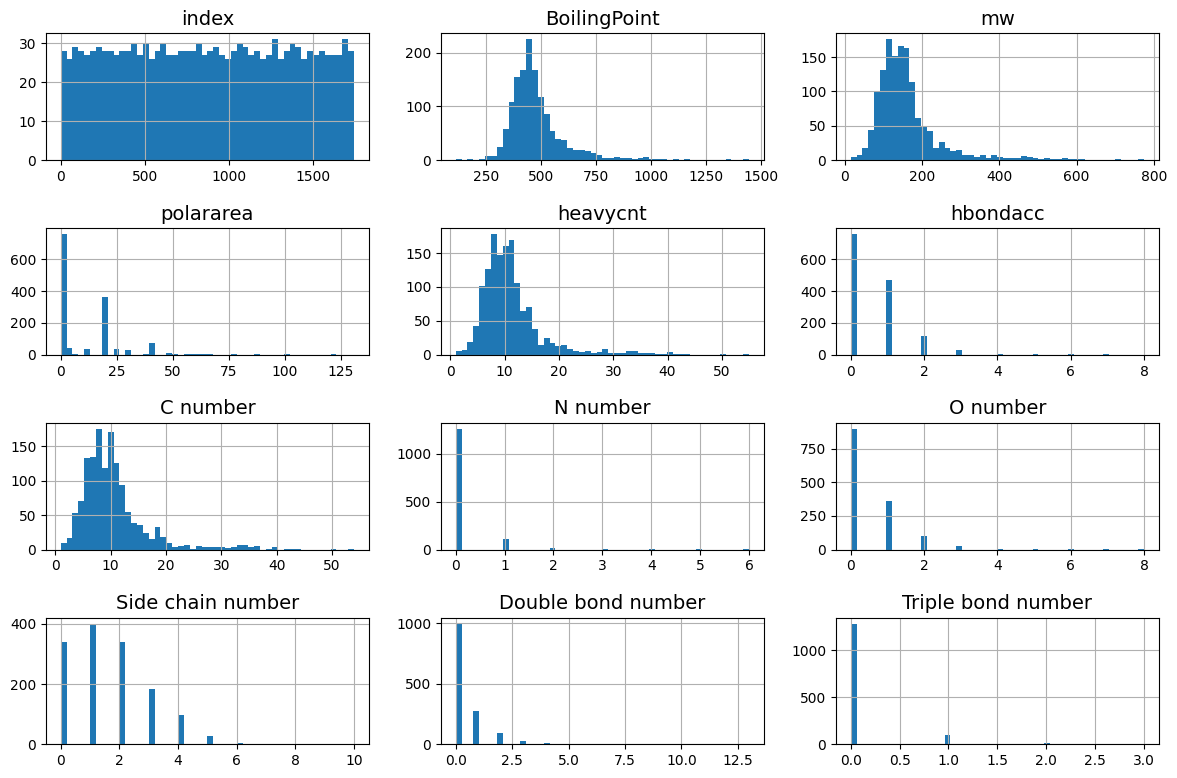

In [26]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train_set.hist(bins=50, figsize=(12, 8))
tight_layout()
show()

### Correlations

In [27]:
cols = ['BoilingPoint', 'mw', 'polararea', 'heavycnt',
       'hbondacc', 'C number', 'N number', 'O number',
       'Side chain number', 'Double bond number', 'Triple bond number']
corr_matrix = train_set[cols].corr()
corr_matrix

,BoilingPoint,mw,polararea,heavycnt,hbondacc,C number,N number,O number,Side chain number,Double bond number,Triple bond number
BoilingPoint,1.000000,0.901435,0.206036,0.895885,0.210724,0.848148,-0.011990,0.226321,0.042129,-0.112495,-0.087090
mw,0.901435,1.000000,-0.057415,0.999418,-0.008058,0.983575,0.002456,-0.009668,0.012054,-0.102778,-0.107748
polararea,0.206036,-0.057415,1.000000,-0.081679,0.944392,-0.225851,0.250145,0.860231,0.011919,-0.177504,-0.072848
heavycnt,0.895885,0.999418,-0.081679,1.000000,-0.033386,0.988051,-0.003116,-0.033314,0.007581,-0.082140,-0.092972
hbondacc,0.210724,-0.008058,0.944392,-0.033386,1.000000,-0.186968,0.329698,0.878020,-0.019256,-0.189898,-0.083640
C number,0.848148,0.983575,-0.225851,0.988051,-0.186968,1.000000,-0.053881,-0.168097,0.010386,-0.051375,-0.078436
N number,-0.011990,0.002456,0.250145,-0.003116,0.329698,-0.053881,1.000000,-0.162380,-0.084467,-0.131163,-0.070732
O number,0.226321,-0.009668,0.860231,-0.033314,0.878020,-0.168097,-0.162380,1.000000,0.022696,-0.131979,-0.051559
Side chain number,0.042129,0.012054,0.011919,0.007581,-0.019256,0.010386,-0.084467,0.022696,1.000000,-0.092460,-0.171591
Double bond number,-0.112495,-0.102778,-0.177504,-0.082140,-0.189898,-0.051375,-0.131163,-0.131979,-0.092460,1.000000,-0.115708


### Scatter Plot

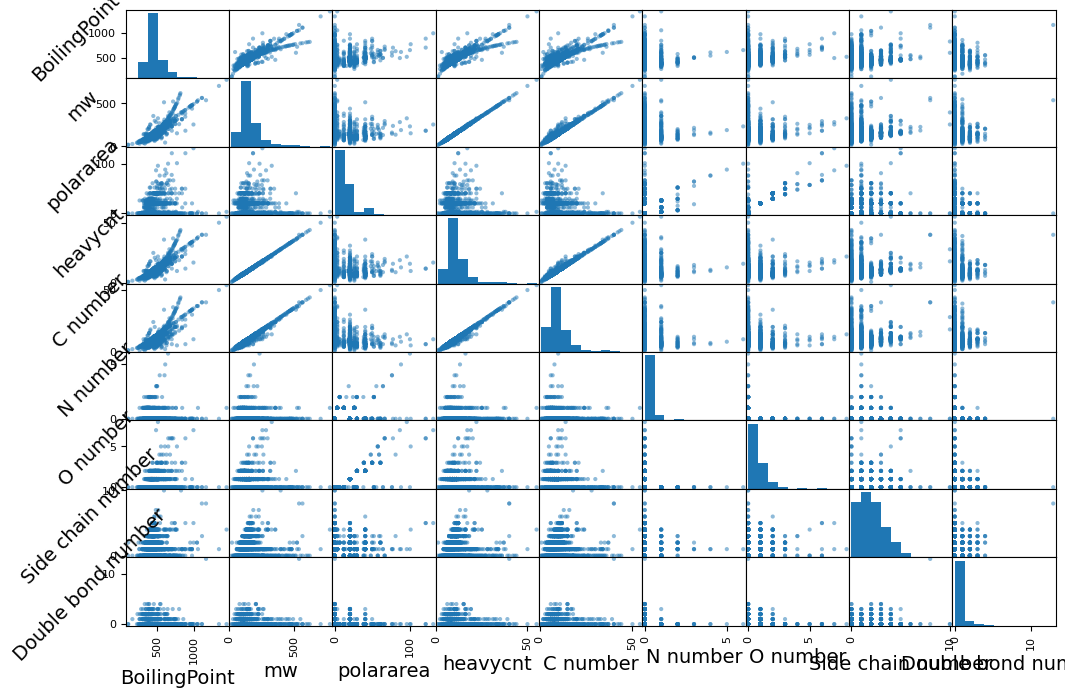

In [28]:
from pandas.plotting import scatter_matrix
cols = ['BoilingPoint', 'mw', 'polararea', 'heavycnt',
        'C number', 'N number', 'O number',
       'Side chain number', 'Double bond number',]
scatters = scatter_matrix(train_set[cols], figsize=(12, 8))
for axs in scatters:
    axs[0].yaxis.label.set_rotation(45)
show()

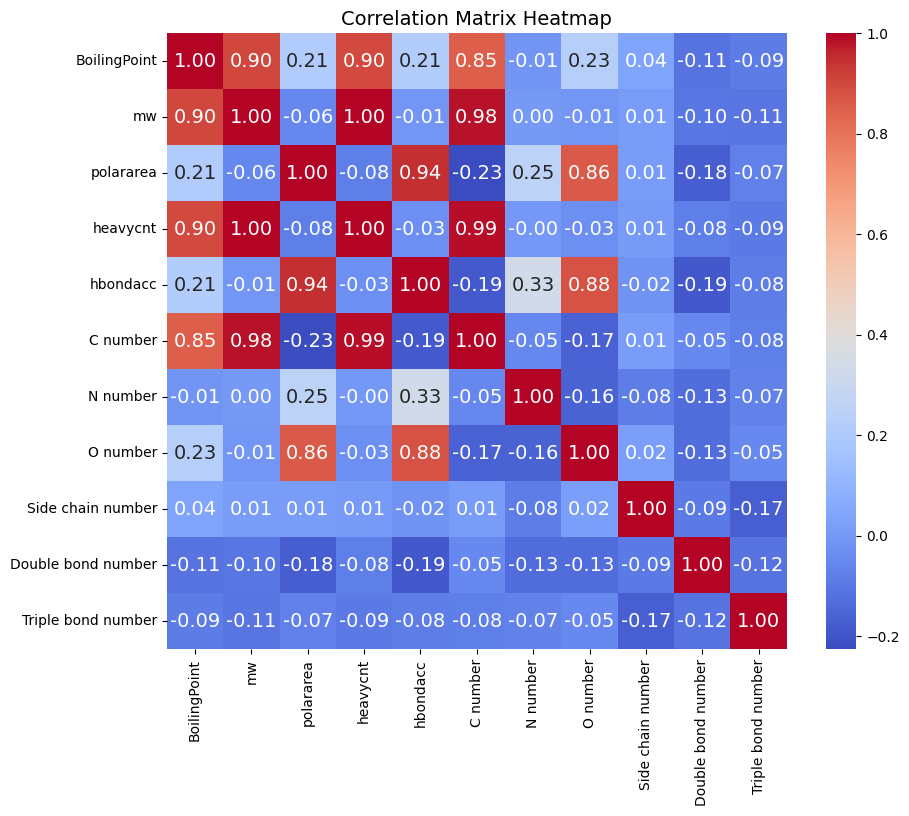

In [29]:
# create heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Plot Heat Map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


## Prepare for ML

### Define Labels
Here we'll use the boiling points as labels. We'll also drop that data from the training set so that it won't be used as a feature

In [30]:
compounds=train_set.drop('BoilingPoint', axis=1)
bps = train_set['BoilingPoint'].copy()

### Encode Category Features
To make the text feature "Classify1" more quantitative, use **"One Hot" encoding**, which adds columns to the data set where a "1" in the correct column indicates the category of the molecule.

In [31]:
compounds_category = compounds[["Classify1"]]
compounds_category.head(10)

,Classify1
0,Alcohol
1,Alcohol
3,Hydrocarbon
4,Hydrocarbon
6,Alcohol
7,Alcohol
8,Alcohol
9,Alcohol
10,Alcohol
11,Alcohol


In [32]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
compounds_cat_1hot = cat_encoder.fit_transform(compounds_category)
compounds_cat_1hot[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [33]:
cat_encoder.categories_

[array(['Alcohol', 'Amine', 'Hydrocarbon'], dtype=object)]

### Scale Numerical Features
Numerical features like MW often have to be modified for machine learning.  We'll use two common approaches:
 - `SimpleImputer` will be used to add missing values with the *average* of that feature. Note that there aren't any missing values here, so this step actually does nothing for this data.
 - `StandardScaler` changes the numerical range of all numerical features to between -1 and 1. This normalization is preferred for many models especially neural networks

### Create Pipelines
We'll put all of our feature prep in a pipeline. We'll start by making a numerical pipeline called `num_pipeline` that combines `SimpleImputer` and `StandardScaler`.

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

---
Then we make a similar pipeline for categories called `cat_pipeline` using `SimpleImputer` and `Standard Scaler`:

In [35]:
cat_pipeline = make_pipeline(
  SimpleImputer(strategy="most_frequent"),
  OneHotEncoder(handle_unknown="ignore"))

cat_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])

---
Then we combine the numerical and category pipelines into a single pipeline called `preprocessing`.  Here we specify which numerical and category features to use.

In [36]:
from sklearn.compose import ColumnTransformer

num_features = ['mw', 'polararea', 'heavycnt',
       'hbondacc', 'C number', 'N number', 'O number',
       'Side chain number', 'Double bond number', 'Triple bond number']

cat_features = ["Classify1"]

preprocessing = ColumnTransformer([
  ("num", num_pipeline, num_features),
  ("cat", cat_pipeline, cat_features),
])

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['mw', 'polararea', 'heavycnt', 'hbondacc',
                                  'C number', 'N number', 'O number',
                                  'Side chain number', 'Double bond number',
                                  'Triple bond number']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Classify1'])])

---

This is what it looks like when we apply `preprocessing` to the data.

In [37]:
compounds_prepared = preprocessing.fit_transform(compounds)
compounds_prepared

array([[-1.14968525,  1.76371677, -1.20031809, ...,  1.        ,
         0.        ,  0.        ],
       [-0.81998664,  1.76371677, -0.86960373, ...,  1.        ,
         0.        ,  0.        ],
       [-1.69068482, -0.70268994, -1.69638964, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.34854702,  0.52746847, -0.37353218, ...,  1.        ,
         0.        ,  0.        ],
       [-0.34854702,  0.52746847, -0.37353218, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.97037671,  0.52746847,  0.94932529, ...,  1.        ,
         0.        ,  0.        ]])

---
Even though this is just an array of numbers, we can still get our feature names back:

In [38]:
preprocessing.get_feature_names_out()

array(['num__mw', 'num__polararea', 'num__heavycnt', 'num__hbondacc',
       'num__C number', 'num__N number', 'num__O number',
       'num__Side chain number', 'num__Double bond number',
       'num__Triple bond number', 'cat__Classify1_Alcohol',
       'cat__Classify1_Amine', 'cat__Classify1_Hydrocarbon'], dtype=object)

## Linear Regression

a Linear Regression model obtains the best fit linear function of all numerical features according to the formula:

$$ \hat{y}=\theta_0+\theta_1 x_1+\theta_2 x_2+\cdots+\theta_n x_n $$

This model is mostly equivalent to linear least squares curve fitting approaches in MATLAB and `scipy`.


---
We combine `preprocessing` with `LinearRegression` into a new pipeline, `lin_reg`. Then we actually fit the data to `bps` using the `fit` method of our new pipeline.

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(compounds, bps)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['mw', 'polararea',
                                                   'heavycnt', 'hbondacc',
                                                   'C number', 'N number',
                                                   'O number',
                                                   'Side chain number',
                                                   'Double bond number',
                                                   'Triple bond number']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Classify1'])])),
                ('linearregression', LinearRegression())])

---
Now we can predict boiling points! We apply the `predict` method of the pipeline to `compounds`, and compare the first five results:

In [40]:
bp_predictions = lin_reg.predict(compounds)
bp_predictions[:5]

array([406.85662925, 447.82811348, 249.94502017, 385.07202515,
       339.19677756])

In [41]:
bps.iloc[:5]

,BoilingPoint
0,470.65
1,455.15
3,111.65
4,398.77
6,351.39


### Figure of Merit

To quantify these differences, we'll use the root-mean-squared error, or RMSE, defined by:
$$ \operatorname{RMSE}(\mathbf{X}, h)=\sqrt{\frac{1}{m} \sum_{i=1}^m\left(h\left(\mathbf{y}^{(i)}\right)-y_{pred}^{(i)}\right)^2} $$

where $m$ is the number of data points, $y$ is the training labels (`bps`) and $y_{pred}$ is the predicted labels (`bp_predictions`).

In [42]:
from sklearn.metrics import root_mean_squared_error
lin_rmse = root_mean_squared_error(bps, bp_predictions)
print(f'The RMSE error for the Linear Model is {lin_rmse:.2f} degrees')

The RMSE error for the Linear Model is 40.67 degrees


### Comparison Plot

We can compare the labels and predictions by plotting. In this plot, an ideal fit has all of the blue dots on the orange line. Not a good look for the linear model.

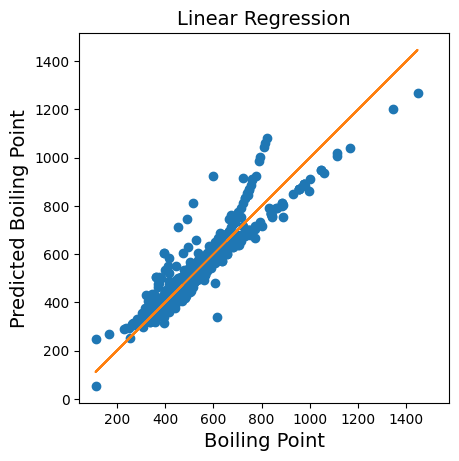

In [43]:
plot_fun(bps, bp_predictions, 'Linear Regression')

### Cross-Validation
We can test these results for *overfitting* by making temporary test sets with a portion of our training data. Here, we use 10% of the training data as a test set. We can actually do this 10 different times with different portions of the training data and then look at statistics.  

**If the RMSE of the full training set is much less than the average RMSE from cross-validation, we have overfitted our data.**

In [44]:
from sklearn.model_selection import cross_val_score

lin_rmses = -cross_val_score(lin_reg, compounds, bps,
                            scoring="neg_root_mean_squared_error", cv=10)

In [45]:
lin_rmses

array([43.23322527, 44.89221186, 50.40467533, 48.12250553, 51.49315954,
       34.72795025, 40.99399251, 39.75964597, 38.92345864, 30.76232771])

In [46]:
pd.Series(lin_rmses).describe()

,0
count,10.000000
mean,42.331315
std,6.680786
min,30.762328
25%,39.132505
50%,42.113609
75%,47.314932
max,51.493160


---
The linear model does not seem to overfit the data, but can we get a better fit?

## Decision Tree

A Decision Tree model determines result based on a series of decisions. Here is an example decision tree for a 1D model:

![decision_tree.jpeg](http://www.egr.msu.edu/~scb/downloads/decision_tree.jpeg)

As can be seen, the more layers of decision tree that are included, the more predictions are possible and the better the fit.

In [47]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(compounds, bps)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['mw', 'polararea',
                                                   'heavycnt', 'hbondacc',
                                                   'C number', 'N number',
                                                   'O number',
                                                   'Side chain number',
                                                   'Double bond number',
                                                   'Triple bond number']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Classify1'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [48]:
bp_predictions = tree_reg.predict(compounds)
tree_rmse = root_mean_squared_error(bps, bp_predictions)
tree_rmse

13.308395769256949

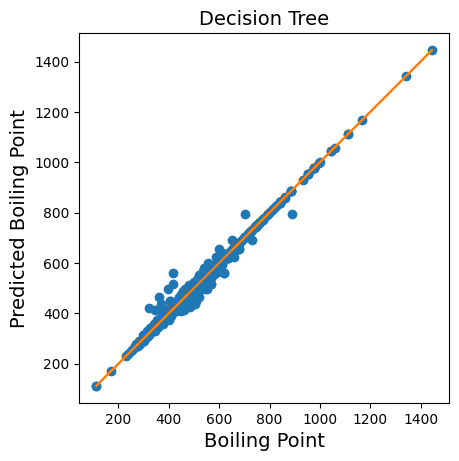

In [49]:
plot_fun(bps, bp_predictions, 'Decision Tree')

### Cross-Validation

In [50]:
tree_rmses = -cross_val_score(tree_reg, compounds, bps,
                            scoring="neg_root_mean_squared_error", cv=10)

In [51]:
tree_rmses

array([50.56784074, 35.04111228, 40.33812447, 60.26504968, 54.68433285,
       19.95579759, 37.75352742, 30.02694782, 41.62674442, 18.54857893])

In [52]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,38.880806
std,13.821273
min,18.548579
25%,31.280489
50%,39.045826
75%,48.332567
max,60.265050


---
Using the Decision Tree, the RMSE error for the entire training set is `13.3`, compared to an average of `39.2` for the cross-validation. This difference suggests that the Decision Tree model is *overfitted* and does not make good predictions.  Let's look at the depth and the number of leaves of our decision tree:

In [53]:
depth = tree_reg[-1].get_depth()
n_leaves = tree_reg[-1].get_n_leaves()

print(f'The depth of the decision tree is {depth} \
and the number of leaves is {n_leaves}')

The depth of the decision tree is 17 and the number of leaves is 586


### Hyperparameter Tuning

The number of leaves is roughly a third of the training set size, which may be too large. Let's use `max_depth` as a *hyperparameter* to tune the model.

In [54]:
tree_reg = make_pipeline(preprocessing,
                         DecisionTreeRegressor(max_depth=10,
                                               random_state=42))
tree_reg.fit(compounds, bps)

bp_predictions = tree_reg.predict(compounds)
tree_rmse = root_mean_squared_error(bps, bp_predictions)
tree_rmse

15.403209953793683

In [55]:
tree_rmses = -cross_val_score(tree_reg, compounds, bps,
                            scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,41.045527
std,12.623954
min,18.673832
25%,34.194735
50%,41.083715
75%,50.500897
max,61.273209


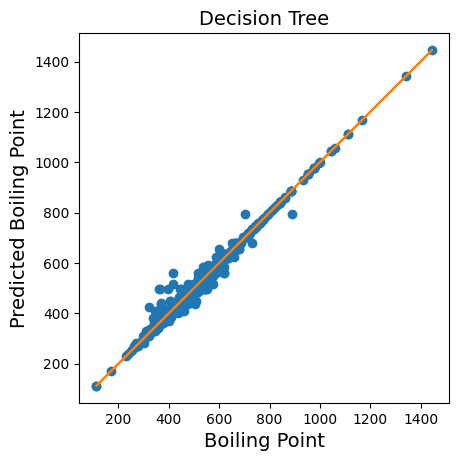

In [56]:
plot_fun(bps, bp_predictions, 'Decision Tree')

---
Changing `max_depth` from `17` to `10` does not have a huge effect. **You can explore other values!**

## Random Forest

The Random Forest model performs multiple decision tree analyses on a subset of features and then chooses the best result. The size of the subset is typically $\sqrt{n}$, where $n$ is the total number of features.  By compairing different subsets, the model can generate an indication of which features are most important.

In [57]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                       RandomForestRegressor(max_depth = 10, random_state=42))
forest_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['mw', 'polararea',
                                                   'heavycnt', 'hbondacc',
                                                   'C number', 'N number',
                                                   'O number',
                                                   'Side chain number',
                                                   'Double bond number',
                                                   'Triple bond number']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Classify1'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, random_state=42))])

In [58]:
forest_reg.fit(compounds, bps)

bp_predictions = forest_reg.predict(compounds)

forest_rmses = -cross_val_score(forest_reg, compounds, bps,
                            scoring="neg_root_mean_squared_error", cv=10)

In [59]:
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,37.391494
std,9.567270
min,24.805492
25%,29.140923
50%,36.907959
75%,44.232308
max,51.731794


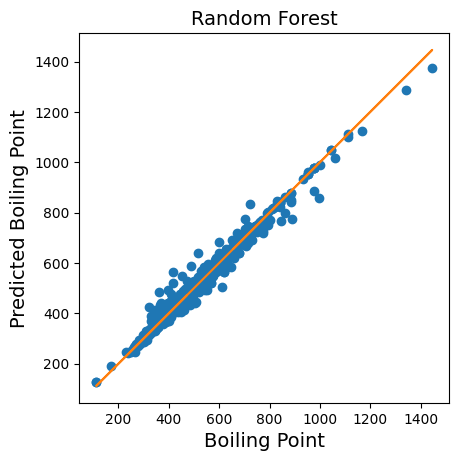

In [60]:
plot_fun(bps, bp_predictions, 'Random Forest')

### Feature Importance

In [61]:
feature_importances = forest_reg['randomforestregressor'].feature_importances_
feature_names = preprocessing.get_feature_names_out()

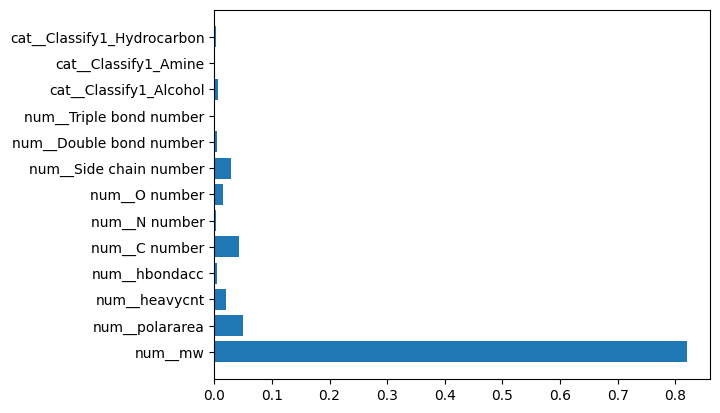

In [62]:
barh(feature_names, feature_importances)
show()

---
Here we see that the molecular weight, `num_mw` is by far the most important feature. However, the polar area, carbon number and side chain number are also significant. The categories do not seem to be important at all.

**Try reducing the number of features in the pipeline to see what affect that has on the results.**

## Compare to Test Data

In [63]:
test_bps = test_set['BoilingPoint'].copy()
test_predictions = forest_reg.predict(test_set)

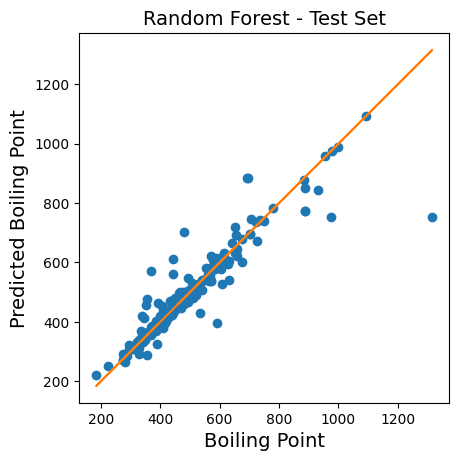

In [64]:
plot_fun(test_bps, test_predictions, 'Random Forest - Test Set')

In [65]:
final_rmse = root_mean_squared_error(test_bps, test_predictions)
print(final_rmse)

47.713669358111616


---
Now we finally compare our result to the test data and see that the predictions are ok but not great. We are off to a good start, but this model certainly could use some improvement.

**What ideas do you have to improve this model, to the point that you would trust it for your work?**